# Imports

In [1]:

from typing import Tuple, List

# importations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from keras.optimizers import Adam
from keras.optimizers import Adadelta
from keras.optimizers import Adagrad
from keras.optimizers import RMSprop
from keras.optimizers import Adamax
from keras.optimizers import Adagrad
from keras.optimizers import Ftrl
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



# Data recuperation

In [2]:
# data set complets
X_train_all = pd.read_csv('train_set.csv')
X_val_all=pd.read_csv('val_set.csv')
X_test_all=pd.read_csv('test_set.csv')

#numpy array
X_train_all= X_train_all.to_numpy()
X_val_all= X_val_all.to_numpy()
X_test_all=X_test_all.to_numpy()


# Data reshape 

In [3]:

X_train= X_train_all[:,0:110].astype(np.float32)
y_train= X_train_all[:,110].astype(np.float32)
X_val= X_val_all[:,0:110].astype(np.float32)
y_val= X_val_all[:,110].astype(np.float32)
X_test= X_test_all.astype(np.float32)


# Model (NN, loss, optimizer &amp; .csv submission file generation)

In [26]:
def evaluate_model(X_train, y_train, X_val, y_val):
    
# define model
    model = Sequential()
    model.add(Dense(66, activation='softsign'))
    model.add(BatchNormalization())
    model.add(Dense(20, activation='softsign'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
    
    
#early stopping 
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
# compile model  
    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.0011, rho=0.9, momentum=0))
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=90, callbacks=[callback], verbose=0)
    len(history.history['loss']) 
# evaluate the model
    train_mse = model.evaluate(X_train, y_train, verbose=0)
    val_mse = model.evaluate(X_val, y_val, verbose=0)
    print('Train: %.3f, Val: %.3f' % (train_mse, val_mse))
    print('Stop at epoch: %.f' % len(history.history['loss']) )
#convert into csv file
    okok = model(X_test).numpy()
    df = pd.DataFrame(okok,columns=["sat1_col"])
    df.to_csv("sat1_col.csv", index = False)

# plot loss during training
    pyplot.title('Mean Squared Error')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='val')
    pyplot.legend()
    pyplot.show()
    return val_mse



# Model training &amp; evaluation

Train: 0.141, Val: 0.140
Stop at epoch: 61


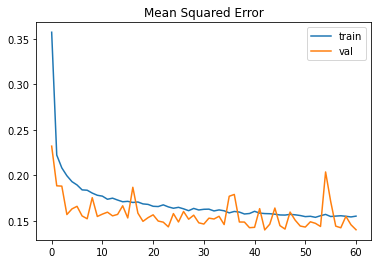

0.14047451317310333

In [27]:
evaluate_model(X_train, y_train, X_val, y_val)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8caafda0-6921-4227-a513-0500323e6b45' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>